In [1]:
# Cell 1 - Import libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score

import joblib

print("✅ Libraries imported successfully.")


✅ Libraries imported successfully.


In [3]:
# Cell 2 - Load dataset
df = pd.read_csv('creditcard.csv')
print("✅ Data loaded successfully.")
print("Shape of dataset:", df.shape)
df.head()


✅ Data loaded successfully.
Shape of dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Cell 3 - Dataset info and imbalance check
print(df.info())
print("\nClass distribution:")
print(df['Class'].value_counts())
print("\nClass percentage (%):")
print((df['Class'].value_counts(normalize=True)*100).round(4))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

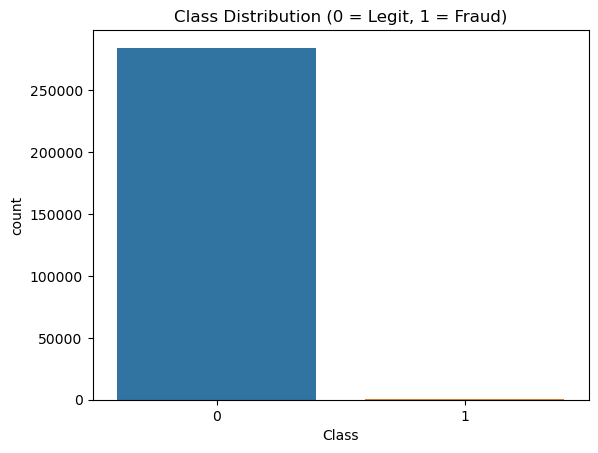

In [7]:
# Cell 4 - Visualize imbalance
sns.countplot(x='Class', data=df, palette=['tab:blue', 'tab:orange'])
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()


In [9]:
# Cell 5 - Feature scaling
scaler_amt = StandardScaler()
scaler_time = StandardScaler()

df['Amount_scaled'] = scaler_amt.fit_transform(df[['Amount']])
df['Time_scaled'] = scaler_time.fit_transform(df[['Time']])

feature_cols = [col for col in df.columns if col not in ('Class', 'Amount', 'Time')]
X = df[feature_cols]
y = df['Class']

print("✅ Features prepared. Total features:", len(feature_cols))


✅ Features prepared. Total features: 30


In [11]:
# Cell 6 - Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


Training set: (227845, 30)
Testing set: (56962, 30)


In [13]:
# Cell 7 - Standardize features
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
print("✅ Feature scaling completed.")


✅ Feature scaling completed.


In [15]:
# Cell 8 - Train Logistic Regression
import time

print("🚀 Training Logistic Regression model...")
t0 = time.time()

model = LogisticRegression(
    class_weight='balanced',
    solver='saga',
    max_iter=2000,
    random_state=42
)
model.fit(X_train_scaled, y_train)

t1 = time.time()
print(f"✅ Training completed in {t1 - t0:.2f} seconds.")


🚀 Training Logistic Regression model...
✅ Training completed in 550.05 seconds.


In [17]:
# Cell 9 - Evaluate model performance
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_proba)
acc = accuracy_score(y_test, y_pred)

print(f"ROC-AUC: {auc:.4f}")
print(f"Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


ROC-AUC: 0.9696
Accuracy: 0.9708

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.91      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
 [[55207  1657]
 [    9    89]]


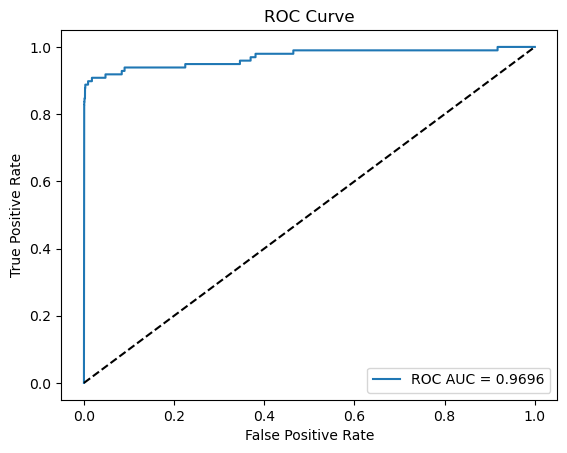

In [19]:
# Cell 10 - Plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC AUC = {auc:.4f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [21]:
# Cell 11 - Save trained model
joblib.dump({
    'model': model,
    'scaler_X': scaler_X,
    'scaler_amt': scaler_amt,
    'scaler_time': scaler_time,
    'features': feature_cols
}, 'logistic_model.joblib')

print("✅ Model saved as 'logistic_model.joblib'.")


✅ Model saved as 'logistic_model.joblib'.


In [23]:
# Cell 12 - Single transaction prediction example
sample = X_test.iloc[0]  # pick one test row
sample_scaled = scaler_X.transform([sample])
prediction = model.predict(sample_scaled)[0]
probability = model.predict_proba(sample_scaled)[0][1]

print("Predicted Class:", prediction)
print("Fraud Probability:", probability)


Predicted Class: 0
Fraud Probability: 0.006667787528548483


In [25]:
# Cell 13 - Predict multiple samples

# Take 10 random transactions from the test set
sample_rows = X_test.sample(10, random_state=42)

# Scale them (using the same scaler as training)
sample_scaled = scaler_X.transform(sample_rows)

# Predict classes and probabilities
pred_classes = model.predict(sample_scaled)
pred_probs = model.predict_proba(sample_scaled)[:, 1]

# Combine results into a DataFrame for clarity
results = pd.DataFrame({
    'Predicted_Class': pred_classes,
    'Fraud_Probability': pred_probs
})

# Add original index so you can trace back to actual transaction
results.index = sample_rows.index
print("🔍 Predicted samples:")
display(results)


🔍 Predicted samples:


,Predicted_Class,Fraud_Probability
2490,0,0.000670
90487,1,0.806500
156589,1,0.972748
138722,0,0.056419
269869,0,0.016486
267535,0,0.029479
222933,1,0.980241
281495,0,0.031936
218751,0,0.014548
29029,0,0.089984
